## Acquire Exercises

### 4. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, `df_iris`, from this data.

    - print the first 3 rows
    - print the number of rows and columns (shape)
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables. Would you
      recommend rescaling the data based on these statistics?

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import prepare
import functions

In [2]:
# df_iris = data('iris')
df_iris = sns.load_dataset('iris')

In [3]:
df_iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
df_iris.shape

(150, 5)

In [5]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
#to list
df_iris.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [7]:
# df_iris.dtypes
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# .T to transpose
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


I would not recommend rescaling the data

### 5. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.
    - assign the first 100 rows to a new dataframe, `df_excel_sample`
    - print the number of rows of your original dataframe
    - print the first 5 column names
    - print the column names that have a data type of `object`
    - compute the range for each of the numeric variables.

In [9]:
df_excel = pd.read_excel('~/codeup-data-science/classification-exercises/Excel_Exercises.xlsx', sheet_name = 'Table1_CustDetails')

In [10]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,Unnamed: 12,Unnamed: 13
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No,NaN,NaN
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No,NaN,NaN
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes,NaN,NaN
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes,NaN,NaN
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes,NaN,NaN


In [11]:
df_excel.drop(['Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)

In [12]:
df_excel

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No


In [13]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

In [14]:
df_excel.shape[0]

7049

In [15]:
# df_excel.select_dtypes(include = 'object')
df_excel.columns[df_excel.dtypes == object].tolist()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [16]:
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [17]:
df_excel.describe()


,is_senior_citizen,phone_service,internet_service,contract_type,monthly_charges,total_charges
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7038.000000
mean,0.162009,1.324585,1.222585,0.690878,64.747014,2283.043883
std,0.368485,0.642709,0.779068,0.833757,30.099460,2266.521984
min,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000
25%,0.000000,1.000000,1.000000,0.000000,35.450000,401.587500
50%,0.000000,1.000000,1.000000,0.000000,70.350000,1397.100000
75%,0.000000,2.000000,2.000000,1.000000,89.850000,3793.775000
max,1.000000,2.000000,2.000000,2.000000,118.750000,8684.800000


In [18]:
for column in df_excel.columns[df_excel.dtypes == float]:
    print(column, df_excel[column].max() - df_excel[column].min())

monthly_charges 100.5
total_charges 8666.0


In [19]:
# with a df
telco_stats = df_excel[['monthly_charges','total_charges']].describe().T
telco_stats['range'] = telco_stats['max'] - telco_stats['min']

In [20]:
telco_stats.head()

,count,mean,std,min,25%,50%,75%,max,range
monthly_charges,7049.0,64.747014,30.099460,18.25,35.4500,70.35,89.850,118.75,100.5
total_charges,7038.0,2283.043883,2266.521984,18.80,401.5875,1397.10,3793.775,8684.80,8666.0


### 6. Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, `df_google`

    - print the first 3 rows
    - print the number of rows and columns
    - print the column names
    - print the data type of each column
    - print the summary statistics for each of the numeric variables
    - print the unique values for each of your categorical variables

In [21]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [22]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
df_google.shape

(891, 12)

In [24]:
df_google.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [25]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
df_google.describe(include = np.number, exclude = int)

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [27]:
df_google[['Survived','Pclass','Sex', 'SibSp', 'Parch','Embarked']].nunique()

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64

In [28]:
# for col in df_google.columns:
#     if df_google[col].dtypes == 'object':
#         print(f'{col} has {df_google[col].nunique()} unique values.')

# Data Preparation Exercises


### Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name and concatenate onto the iris dataframe.

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [29]:
# import iris data
df = acquire.get_iris_data()

In [30]:
# drop species id, measurement_id is not in original df
df.drop(columns = 'species_id', inplace = True)

In [31]:
# rename species_name to species
df.rename(columns = {'species_name':'species'}, inplace = True)

In [32]:
# create dummy variables of species
dummy_df = pd.get_dummies(df[['species']], dummy_na = False, drop_first = [True, True])

In [33]:
# concat dummy vars into df
df = pd.concat([df, dummy_df], axis = 1)

In [34]:
# check df
df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [35]:
def prep_iris(df):
    '''
    Takes in Iris dataframe and returns a prepared version of the dataframe
    '''
    df.drop(columns = 'species_id', inplace = True)
    df.rename(columns = {'species_name':'species'}, inplace = True)
    dummy_df = pd.get_dummies(df[['species']], dummy_na = False, drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis = 1)
    return df

### Using the Titanic dataset:

1. Use the function defined in acquire.py to load the Titanic data.

2. Drop any unnecessary, unhelpful, or duplicated columns.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [36]:
# load titanic data
df = acquire.get_titanic_data()

In [37]:
df.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [38]:
# drop duplicates
df.drop_duplicates(inplace = True)

In [39]:
# find null values
df.isnull().sum()[df.isnull().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

In [40]:
# drop columns with many nulls and unnecessary data
df.drop(columns = ['age', 'embarked', 'deck','class'], inplace=True)

In [41]:
# create dummy vars and concat
dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na = False, drop_first = [True, True])
df = pd.concat([df, dummy_df], axis = 1)

In [42]:
df.head(1)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.25,Southampton,0,1,0,1


In [43]:
# create function
def prep_titanic(df):
    '''
    Takes in titanic dataframe and returns prepared version of the dataframe
    '''
    df.drop_duplicates(inplace = True)
    df.drop(columns = ['age', 'embarked', 'deck','class'], inplace=True)
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na = False, drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis = 1)
    return df

### Using the Telco dataset:

1. Use the function defined in acquire.py to load the Telco data.

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [44]:
df = acquire.get_telco_data()

In [45]:
df.total_charges = df.total_charges.str.strip()
df = df[df.total_charges != ""]
df.total_charges = df.total_charges.astype(float)

In [46]:
# drop duplicates
df.drop_duplicates(inplace = True)
# drop unnecessary columns
# df.drop(columns = ['customer_id', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'internet_service_type', 'payment_type','contract_type'], inplace = True)

In [47]:
dummy_df = pd.get_dummies(df[['gender','partner','dependents','multiple_lines', 'streaming_tv','streaming_movies','paperless_billing','churn',]], dummy_na = False, drop_first = [True, True])
df = pd.concat([df, dummy_df], axis = 1)

In [48]:
df.drop(columns = ['streaming_tv_No internet service','streaming_movies_No internet service','customer_id', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'internet_service_type', 'payment_type','contract_type'], inplace = True)

In [49]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,churn,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes
0,2,1,3,Female,0,Yes,Yes,65,Yes,Yes,...,No,0,1,1,0,1,1,1,1,0
1,4,1,3,Male,0,No,No,54,No,No phone service,...,No,1,0,0,1,0,1,0,0,0
2,3,1,3,Female,0,No,No,56,No,No phone service,...,No,0,0,0,1,0,0,0,0,0
3,4,1,3,Male,0,Yes,Yes,20,No,No phone service,...,No,1,1,1,1,0,0,0,1,0
4,3,1,3,Male,0,Yes,No,72,Yes,Yes,...,No,1,1,0,0,1,1,1,1,0


In [50]:
def prep_telco(df):
    '''
    Takes in titanic dataframe and returns prepared version of the dataframe
    '''
    # Drop duplicates
    df.drop_duplicates(inplace = True)
    ####### Change total_charges to float #######
    df.total_charges = df.total_charges.str.strip()
    df = df[df.total_charges != ""]
    df.total_charges = df.total_charges.astype(float)
    #############################################
    dummy_df = pd.get_dummies(df[['gender','partner','dependents','multiple_lines', 'streaming_tv','streaming_movies','paperless_billing','churn',]], dummy_na = False, drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis = 1)
    # Drop unecessary columns
    df.drop(columns = ['streaming_tv_No internet service','streaming_movies_No internet service','customer_id', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'internet_service_type', 'payment_type','contract_type'], inplace = True)


    return df

### General split data function

In [51]:
def split_data(df):
    '''
    Takes in a dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2)
    train, validate = train_test_split(train, test_size = .3)
    return train, validate, test

In [52]:
train, validate, test = split_data(df)

In [53]:
print(f'Train: {train.shape}') 
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (3937, 25)
Validate: (1688, 25)
Test: (1407, 25)


# Exploratory Analysis Exercises

### Section 1 - iris_db

1. Acquire, prepare & split your data.

2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

### 1. Acquire, prep, split data

In [54]:
df = acquire.get_iris_data()
df = prepare.prep_iris(df)
train, validate, test = prepare.split_iris(df)

In [55]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
88,versicolor,5.6,3.0,4.1,1.3,1,0
135,virginica,7.7,3.0,6.1,2.3,0,1
42,setosa,4.4,3.2,1.3,0.2,0,0
62,versicolor,6.0,2.2,4.0,1.0,1,0
96,versicolor,5.7,2.9,4.2,1.3,1,0


### 2. Univariate Stats

In [56]:
### descriptive statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,0.333333,0.333333
std,0.828066,0.435866,1.765298,0.762238,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


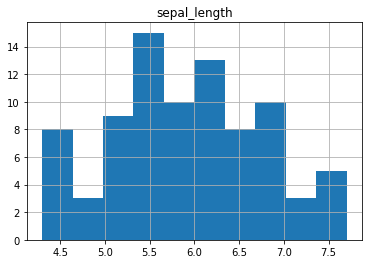

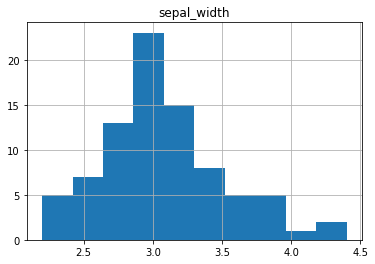

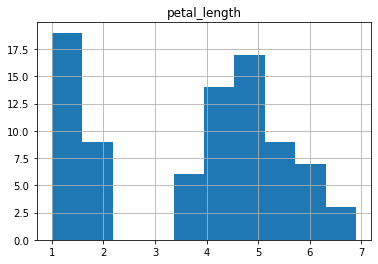

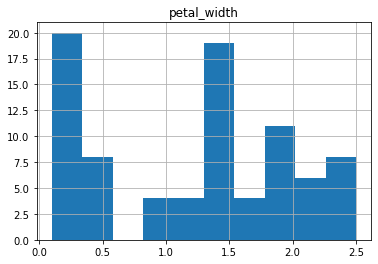

In [57]:
functions.plot_hist(df, train)

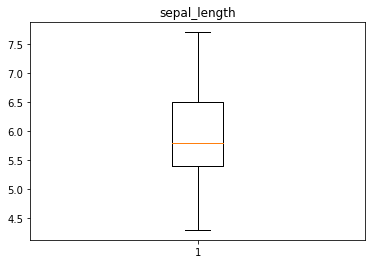

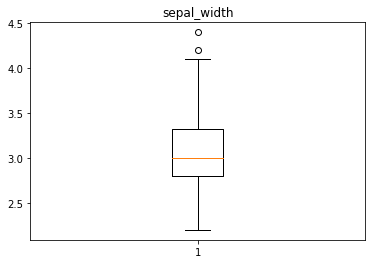

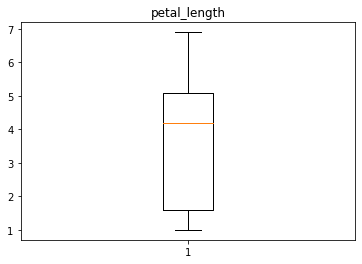

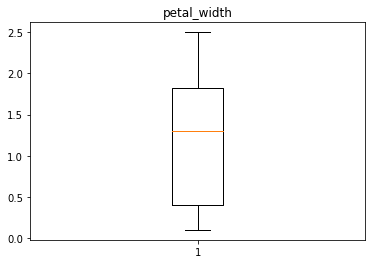

In [58]:
functions.plot_box(df, train)

In [59]:
frequency = train.species.value_counts()

<BarContainer object of 84 artists>

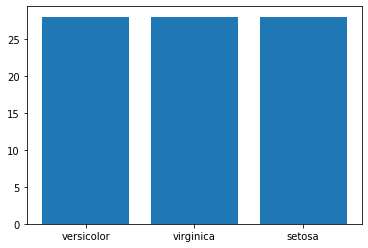

In [60]:
plt.bar(train.species, frequency[1])

### Document



### 3. Bivariate Stats


Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

In [61]:
iris_floats = train.columns[train.dtypes == float].tolist()

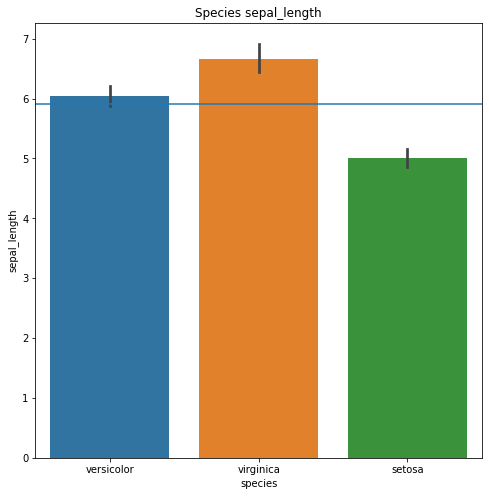

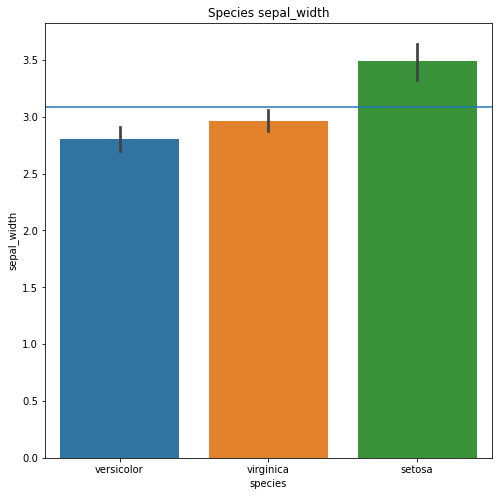

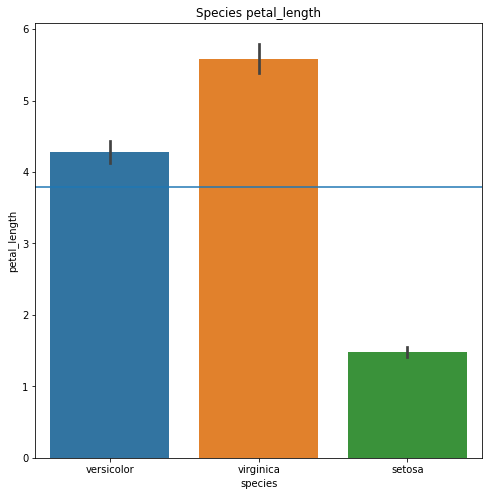

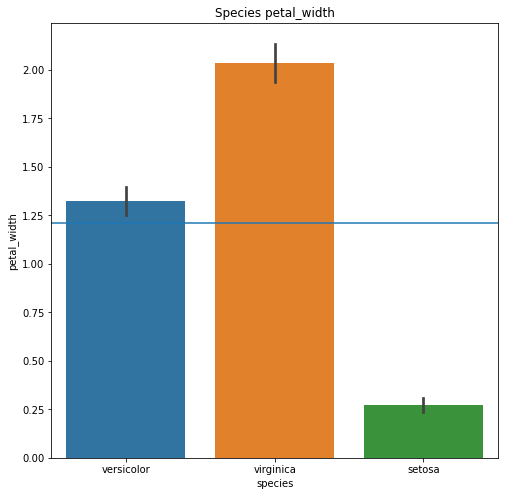

In [62]:
for col in iris_floats:
    plt.figure(figsize= (8,8))
    sns.barplot(data = train, x = 'species', y = col)
    plt.axhline(train[col].mean())
    plt.ylabel(col)
    plt.xlabel('species')
    plt.title(f'Species {col}')

In [63]:
for col in iris_floats:
    print(train[col].describe())

count    84.000000
mean      5.901190
std       0.851999
min       4.300000
25%       5.400000
50%       5.800000
75%       6.500000
max       7.700000
Name: sepal_length, dtype: float64
count    84.000000
mean      3.084524
std       0.444103
min       2.200000
25%       2.800000
50%       3.000000
75%       3.325000
max       4.400000
Name: sepal_width, dtype: float64
count    84.000000
mean      3.783333
std       1.771245
min       1.000000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
count    84.000000
mean      1.210714
std       0.756660
min       0.100000
25%       0.400000
50%       1.300000
75%       1.825000
max       2.500000
Name: petal_width, dtype: float64


In [64]:
versicolor = train[train.species == 'versicolor']

In [65]:
virginica = train[train.species == 'virginica']

In [66]:
setosa = train[train.species == 'setosa']

In [67]:
for col in iris_floats:
    print(f'versicolor and {col} \n {stats.mannwhitneyu(train.versicolor, train[col])} \n')
    print(f'virginica and {col} \n {stats.mannwhitneyu(train.virginica, train[col])} \n')

versicolor and sepal_length 
 MannwhitneyuResult(statistic=0.0, pvalue=1.4437541015214136e-30) 

virginica and sepal_length 
 MannwhitneyuResult(statistic=0.0, pvalue=1.4437541015214136e-30) 

versicolor and sepal_width 
 MannwhitneyuResult(statistic=0.0, pvalue=1.3182907971048268e-30) 

virginica and sepal_width 
 MannwhitneyuResult(statistic=0.0, pvalue=1.3182907971048268e-30) 

versicolor and petal_length 
 MannwhitneyuResult(statistic=14.0, pvalue=2.349348144886498e-30) 

virginica and petal_length 
 MannwhitneyuResult(statistic=14.0, pvalue=2.349348144886498e-30) 

versicolor and petal_width 
 MannwhitneyuResult(statistic=840.0, pvalue=1.3540101358226924e-18) 

virginica and petal_width 
 MannwhitneyuResult(statistic=840.0, pvalue=1.3540101358226924e-18) 



### Document

### 4. Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

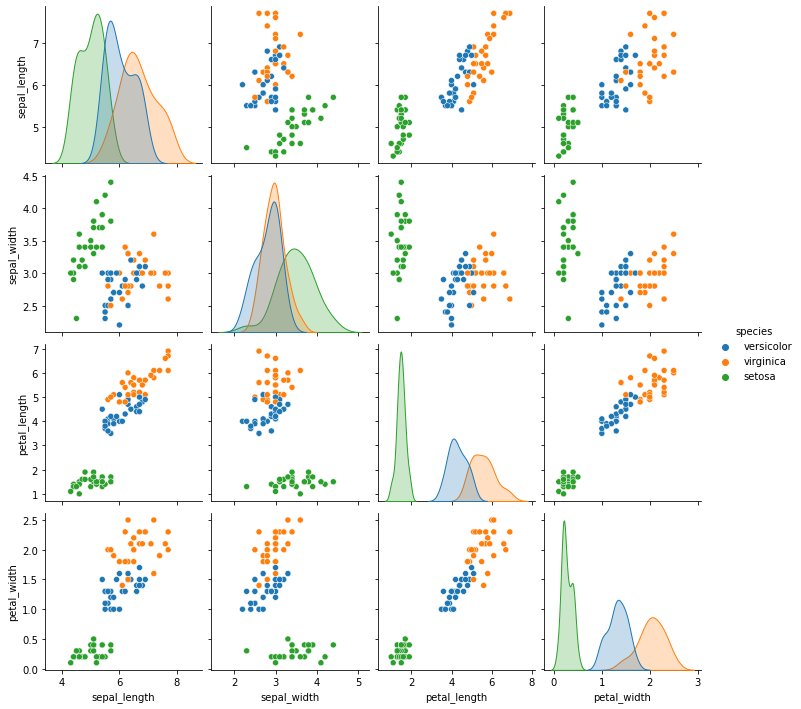

In [68]:
sns.pairplot(data = train, vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"], hue= "species")

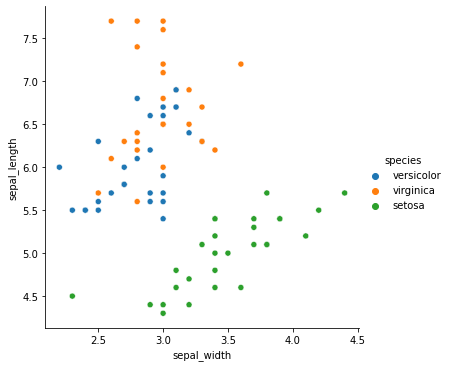

In [69]:
# for col, col2 in (iris_floats, iris_floats[1:-1]):
#     rel = sns.relplot(x = col, y = col2, data = train, hue = 'species')
rel = sns.relplot(x='sepal_width', y='sepal_length', data=train, hue="species")

In [70]:
# for col in iris_floats:
#     plt.figure()
#     sns.swarmplot(data = train, y = col, x = 'species')

Is petal width in virginica significantly larger than setosa

<AxesSubplot:xlabel='species', ylabel='petal_width'>

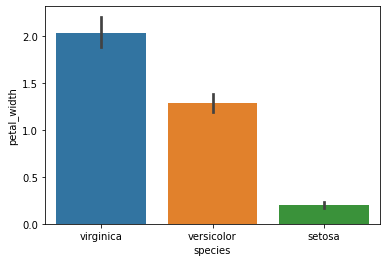

In [71]:
sns.barplot(data = test, x = 'species', y = 'petal_width')

In [72]:
print(stats.mannwhitneyu(train.species == 'versicolor', train.petal_width))
print(stats.mannwhitneyu(train.species == 'setosa', train.petal_width))

MannwhitneyuResult(statistic=840.0, pvalue=1.3540101358226924e-18)
MannwhitneyuResult(statistic=840.0, pvalue=1.3540101358226924e-18)


In [73]:
print(stats.ttest_ind(train.species == 'versicolor', train.petal_width))
print(stats.ttest_ind(train.species == 'setosa', train.petal_width))

Ttest_indResult(statistic=-9.004932558747578, pvalue=4.900068355642124e-16)
Ttest_indResult(statistic=-9.004932558747578, pvalue=4.900068355642124e-16)


### Section 2: Titanic
Explore your titanic dataset more completely.

1. Determine drivers of the target variable
2. Determine if certain columns should be dropped
3. Determine if it would be valuable to bin some numeric columns
4. Determine if it would be valuable to combine multiple columns into one.
5. Does it make sense to combine any features?

6. Do you find any surprises?

7. Document any and all findings and takeaways in your notebook using markdown.

In [74]:
df = acquire.get_titanic_data()
df = prepare.prep_titanic(df)
train, validate, test = prepare.split_titanic(df)

Target Variable = Survived

In [75]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
322,322,1,2,female,0,0,12.3500,Queenstown,1,0,1,0
325,325,1,1,female,0,0,135.6333,Cherbourg,1,0,0,0
334,334,1,1,female,1,0,133.6500,Southampton,0,0,0,1
810,810,0,3,male,0,0,7.8875,Southampton,1,1,0,1
149,149,0,2,male,0,0,13.0000,Southampton,1,1,0,1


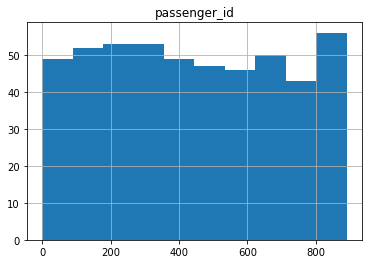

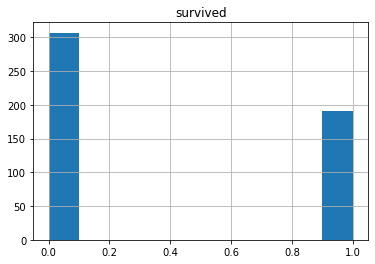

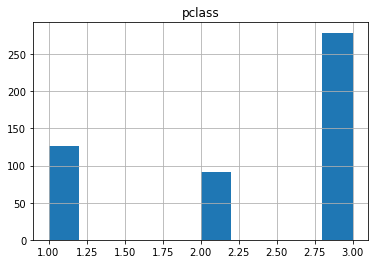

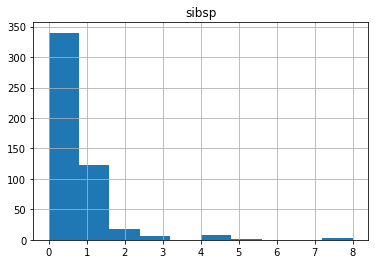

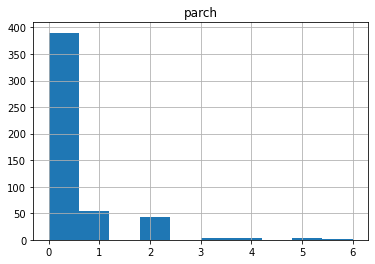

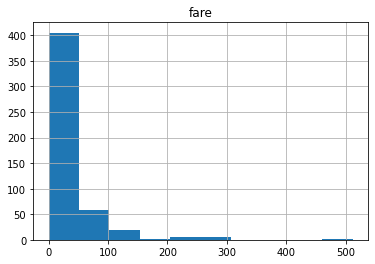

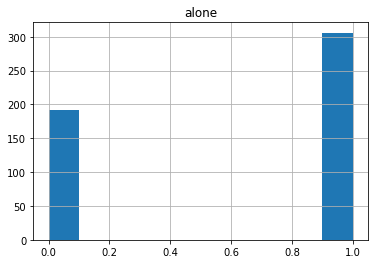

In [76]:
functions.plot_hist(df, train)

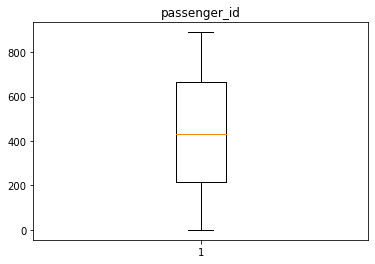

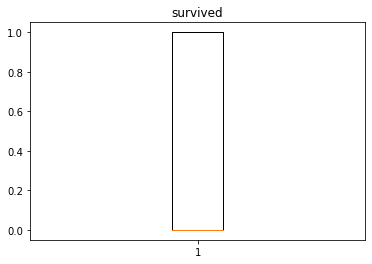

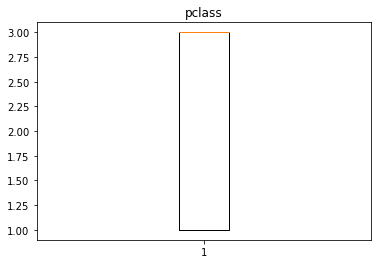

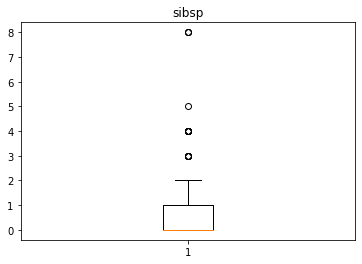

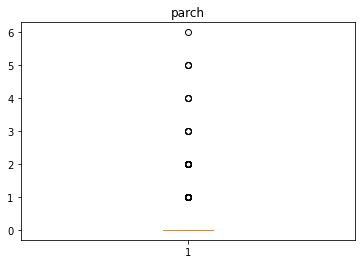

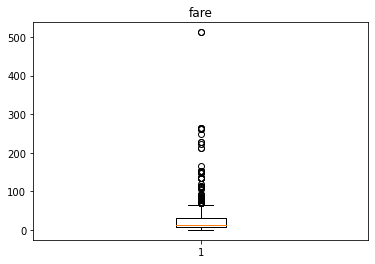

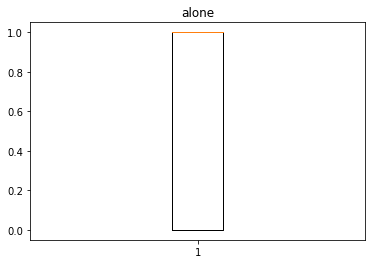

In [77]:
functions.plot_box(df, train)

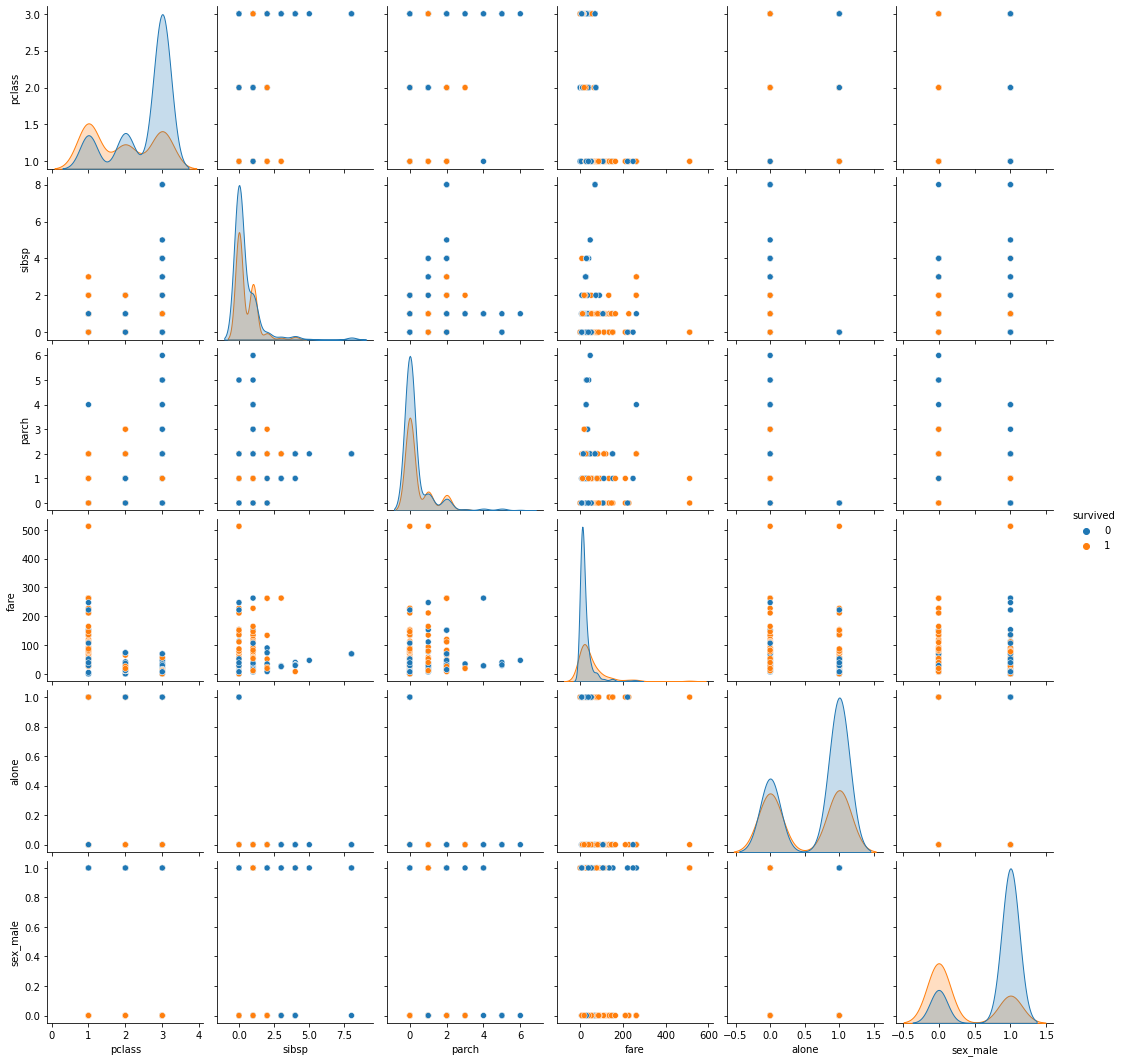

In [78]:
sns.pairplot(data = train, vars = ['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male'], hue = 'survived')

### Drivers of survival

- Female
- In a group
- 1st class

<AxesSubplot:xlabel='sex', ylabel='survived'>

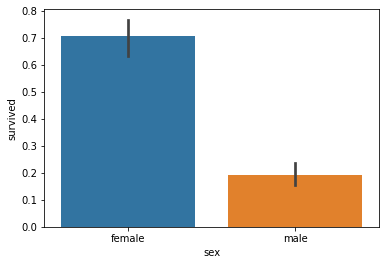

In [79]:
sns.barplot(data = train, y = 'survived', x = 'sex')

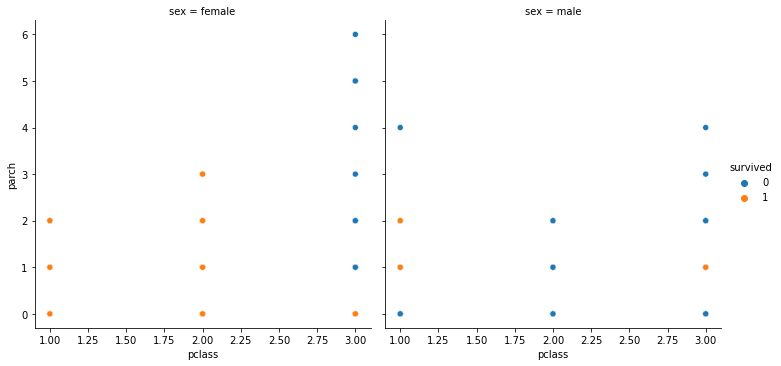

In [80]:
sns.relplot(data = train, y = 'parch', x = 'pclass', hue = 'survived', col = 'sex')

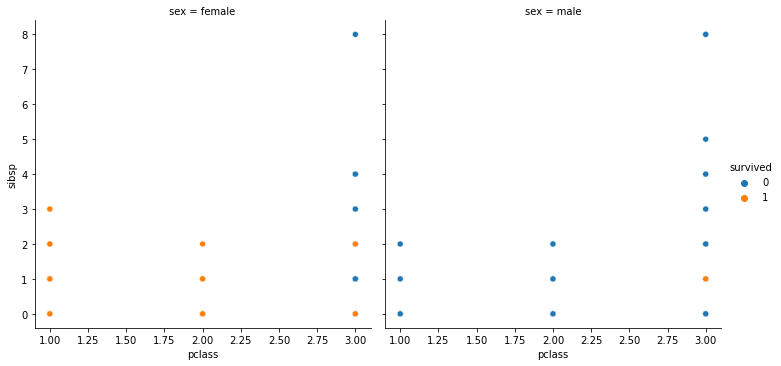

In [81]:
sns.relplot(data = train, y = 'sibsp', x = 'pclass', hue = 'survived', col = 'sex')

### Columns already dropped in prep

### Combine columns into one

Sibsp and Parch into one group, as sibsp is siblings/spouses and parch is parent/child. Adding these will provide total of accompanied.

In [82]:
train['total_company'] = train.sibsp + train.parch
validate['total_company'] = validate.sibsp + validate.parch
test['total_company'] = test.sibsp + test.parch

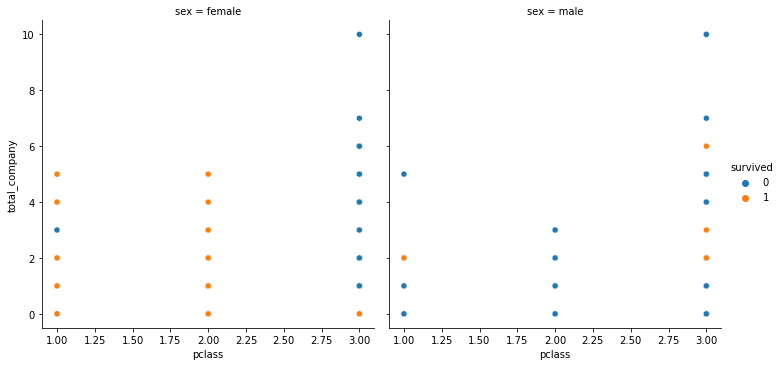

In [83]:
sns.relplot(data = train, y = 'total_company', x = 'pclass', hue = 'survived', col = 'sex')

### Document
Females more likely to survive than males

Those in a group are more likely to survive, slightly regardless of class

Those in first class most likely to survive


### Section 3. Telco

Explore your telco data to discover drivers of churn

Determine if certain columns should be dropped

Determine if it would be valuable to bin some numeric columns

Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [84]:
df = acquire.get_telco_data()
df = prepare.prep_telco(df)
train, validate, test = prepare.split_telco(df)

In [85]:
train.head()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,churn,gender_Male,partner_Yes,dependents_Yes,multiple_lines_No phone service,multiple_lines_Yes,streaming_tv_Yes,streaming_movies_Yes,paperless_billing_Yes,churn_Yes
5641,3,3,3,Female,0,No,No,35,Yes,Yes,...,No,0,0,0,0,1,0,0,0,0
2590,1,2,3,Male,0,Yes,No,71,Yes,No,...,No,1,1,0,0,0,1,1,1,0
3410,1,2,1,Female,0,No,No,7,Yes,Yes,...,Yes,0,0,0,0,1,0,0,1,1
3280,3,2,2,Male,1,No,No,51,Yes,No,...,No,1,0,0,0,0,1,1,1,0
2102,2,1,1,Female,0,Yes,Yes,2,No,No phone service,...,No,0,1,1,1,0,0,0,1,0


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5641 to 4212
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   payment_type_id                  3937 non-null   int64  
 1   internet_service_type_id         3937 non-null   int64  
 2   contract_type_id                 3937 non-null   int64  
 3   gender                           3937 non-null   object 
 4   senior_citizen                   3937 non-null   int64  
 5   partner                          3937 non-null   object 
 6   dependents                       3937 non-null   object 
 7   tenure                           3937 non-null   int64  
 8   phone_service                    3937 non-null   object 
 9   multiple_lines                   3937 non-null   object 
 10  streaming_tv                     3937 non-null   object 
 11  streaming_movies                 3937 non-null   object 
 12  paperless_billing

### Target : Churn

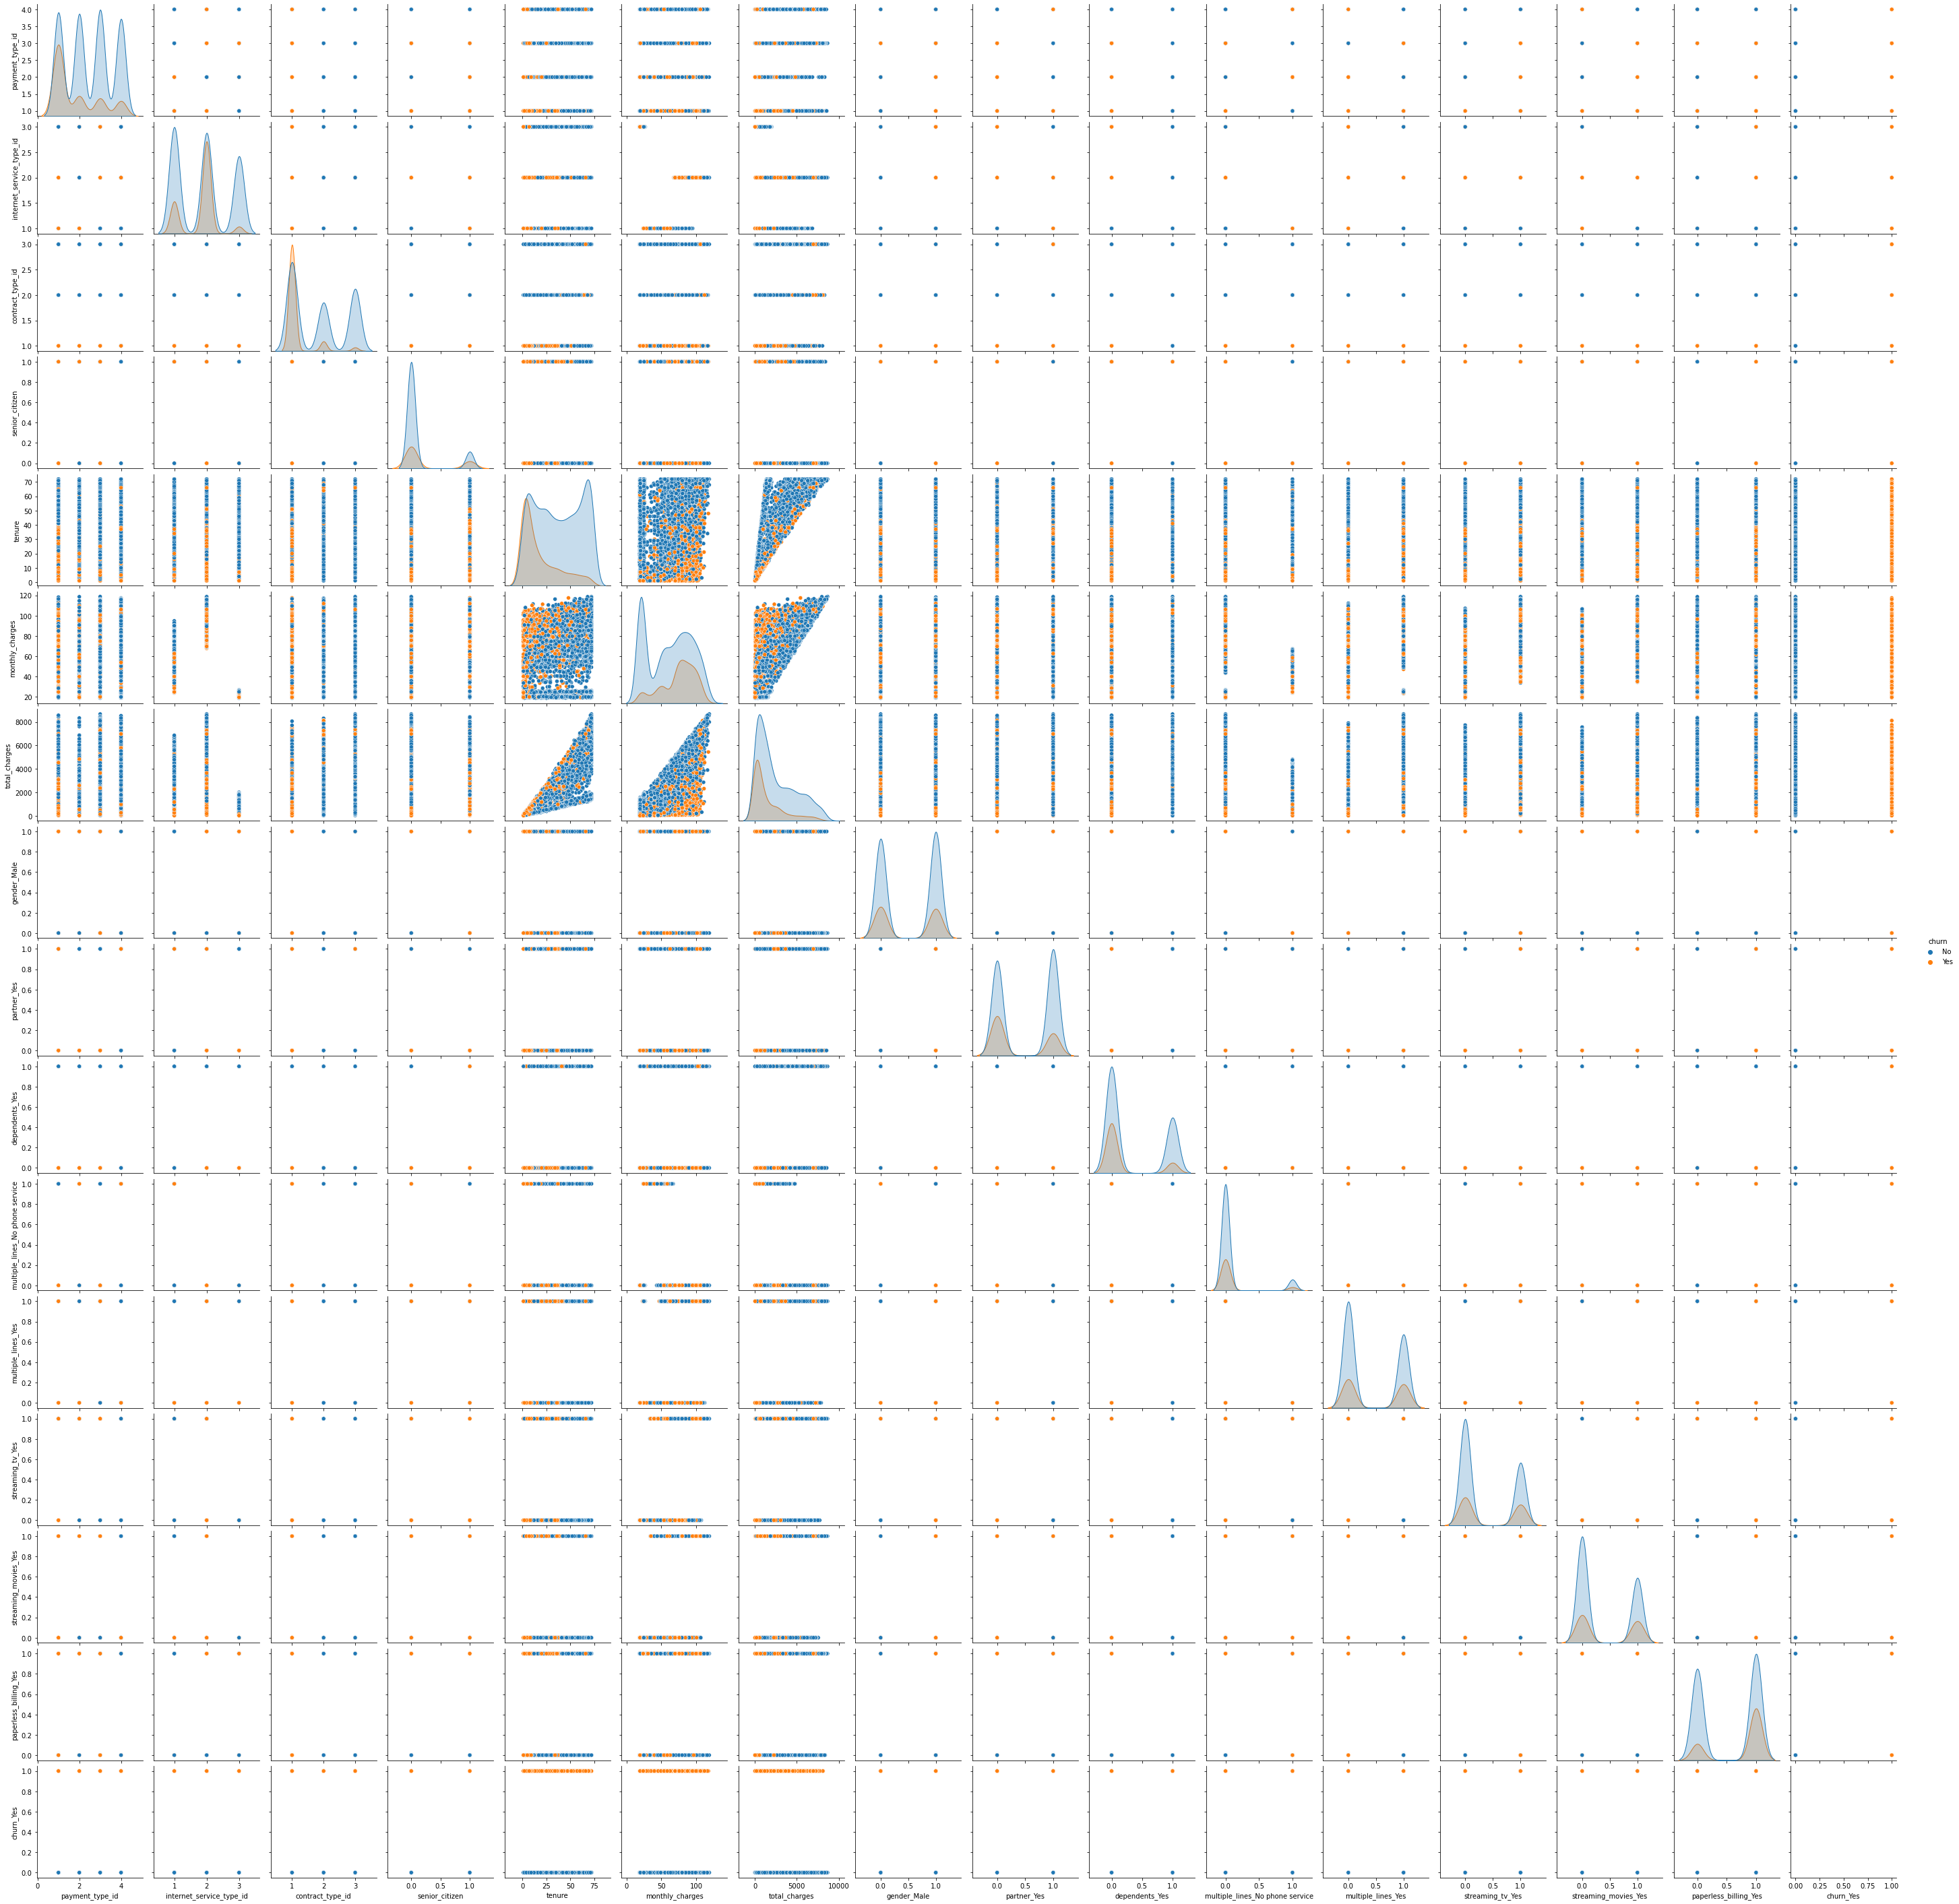

In [88]:
sns.pairplot(data = train, vars = [hue = 'churn')